In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def standard_mean_difference(data, treatment_col, outcome_col):
    """
    Calculate the standard mean difference for a single variable.
    """
    treated = data[data[treatment_col] == 1]
    control = data[data[treatment_col] == 0]
    
    mean_treated = treated[outcome_col].mean()
    mean_control = control[outcome_col].mean()
    pooled_sd = np.sqrt((treated[outcome_col].std()**2 + control[outcome_col].std()**2) / 2)
    
    smd = (mean_treated - mean_control) / pooled_sd
    return smd

def plot_love(features, data, treatment_col, group_col, group_val=1):
    sorted_features = sorted(features, reverse=True)
    smds_overall = {feature: standard_mean_difference(data, treatment_col, feature) for feature in sorted_features}
    smds_matched = {feature: standard_mean_difference(data[data[group_col] == group_val], treatment_col, feature) for feature in sorted_features}

    if len(sorted_features) == 1:
        fig, ax = plt.subplots(figsize=(8, 2))  # Shorter y-axis for 1 feature
        y_ticks = np.linspace(0.5, 0.5, len(sorted_features))  # Center the single feature
    elif len(sorted_features) == 2:
        fig, ax = plt.subplots(figsize=(8, 3))  # Slightly larger y-axis for 2 features
        y_ticks = [0.2, 0.8]  # More white space for 2 features
    else:
        fig, ax = plt.subplots(figsize=(8, 6))  # Default size for 3 or more features
        y_ticks = np.linspace(0, 1, len(sorted_features))  # Use full range for 3 or more features

    ax.set_xlim(-3, 3)

    for i, feature in enumerate(sorted_features):
        ax.scatter(smds_overall[feature], y_ticks[i], color='blue', alpha=0.5, label='All Obs' if i == 0 else "")
        ax.scatter(smds_matched[feature], y_ticks[i], color='red', marker='D', alpha=0.5, label='Matched Obs' if i == 0 else "")

    ax.axvline(x=0, color='black', linestyle='--')
    ax.axvspan(-0.1, 0.1, color='grey', alpha=0.2)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(sorted_features)
    ax.set_title('Standardized Mean Differences (Love Plot)')

    # Move the legend below the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.075), shadow=True, ncol=2)

    plt.tight_layout()
    plt.show()


In [5]:
# Specify the features to plot
#features_to_plot = ['Dollars2']
#features_to_plot = ['Dollars2', 'Age2']
#features_to_plot = ['Dollars2', 'Age2', 'Age1']
features_to_plot = ['Dollars2', 'Age2', 'Age1', 'Dollars1']
# Load your dataset
cvd3_matched = pd.read_csv('CVD3_matched.csv')

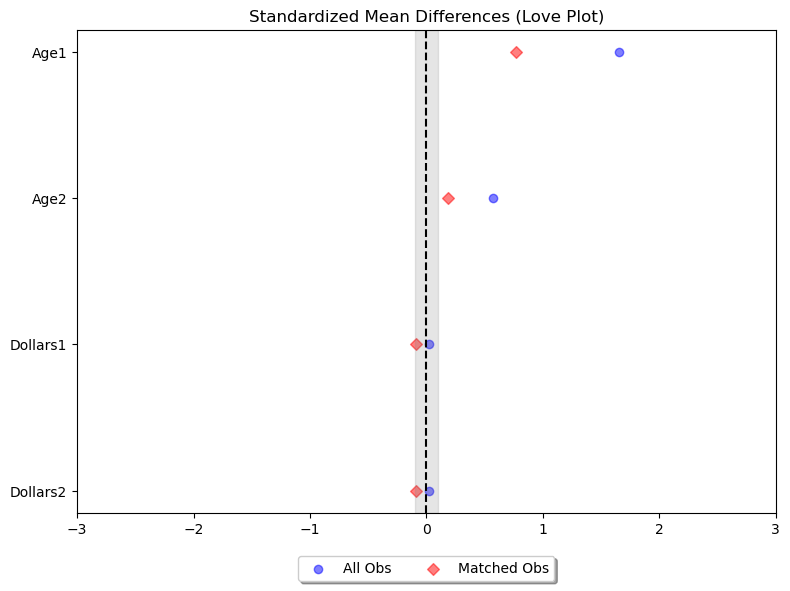

In [7]:
# Call the plotting function with the specified features
plot_love(features=features_to_plot, data=cvd3_matched, treatment_col='CVD', group_col='match_ind')